In [1]:
# From: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


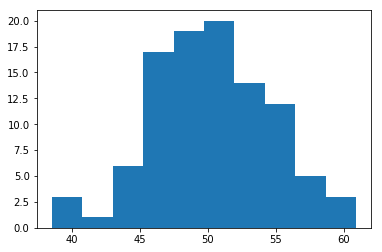

In [3]:
from matplotlib import pyplot
# histogram plot
pyplot.hist(data)
pyplot.show()

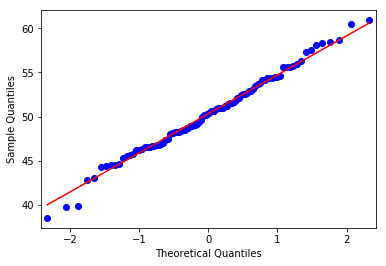

In [4]:
from statsmodels.graphics.gofplots import qqplot
# q-q plot
qqplot(data, line='s')
pyplot.show()

In [5]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


In [6]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


In [7]:
# From: https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9
# Shapiro-Wilk Test
from scipy.stats import shapiro
from scipy.stats import norm
# Create the random variables with mean 5, and sd 3
x_10 = norm.rvs(loc=5, scale=3, size=10)
x_50 = norm.rvs(loc=5, scale=3, size=50)
x_100 = norm.rvs(loc=5, scale=3, size=100)
x_1000 = norm.rvs(loc=5, scale=3, size=1000)
# Print the p values
print(shapiro(x_10))
print(shapiro(x_50))
print(shapiro(x_100))
print(shapiro(x_1000))
# (The test statistic, the p-value) for x_N above
# (0.9122101664543152, 0.2965205907821655) # Null Accepted
# (0.9418673515319824, 0.015981076285243034) # Null Rejected
# (0.9918511509895325, 0.810341477394104) # Null Accepted
# (0.9987027645111084, 0.6903988718986511) Null Accepted

(0.9756130576133728, 0.937462329864502)
(0.9822366833686829, 0.6493431925773621)
(0.9902752041816711, 0.6868489384651184)
(0.9980342984199524, 0.297299861907959)


(0.9467288255691528, 7.196542352923968e-14)


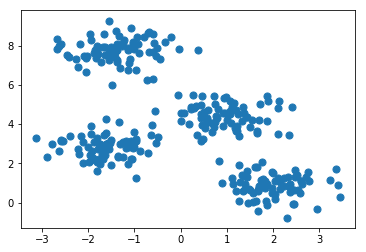

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
from scipy.stats import shapiro
from scipy.stats import norm
stat, p = shapiro(X)
print(shapiro(X))